In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

from biopandas.pdb import PandasPdb
from sklearn.decomposition import PCA
from colav.extract_data import *

In [2]:
# extract the feature information
resnum_bounds = (7, 279)
theseus_strucs = sorted(glob.glob("../results/ptp1b_data/ptp1b_theseus_data/*pdb"))
print(theseus_strucs)
dh_data_matrix, dh_strucs = generate_dihedral_matrix(
    structure_list=theseus_strucs, resnum_bounds=resnum_bounds, save=False, verbose=True
)

['../results/ptp1b_data/ptp1b_theseus_data/theseus_1a5y_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1aax_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1bzc_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1bzh_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1bzj_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1c83_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1c84_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1c85_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1c86_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1c87_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1c88_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1ecv_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1een_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/theseus_1eeo_chainA.pdb', '../results/ptp1b_data/ptp1b_theseus_data/these

In [3]:
# perform PCA
dh_sin_cos_data_matrix = np.hstack([np.sin(dh_data_matrix), np.cos(dh_data_matrix)])
pca = PCA(n_components=10)
transform = pca.fit_transform(dh_sin_cos_data_matrix)
pca.explained_variance_ratio_

array([0.29747788, 0.06309758, 0.037037  , 0.03535305, 0.0287802 ,
       0.02453796, 0.02153294, 0.01868359, 0.01458315, 0.0134354 ])

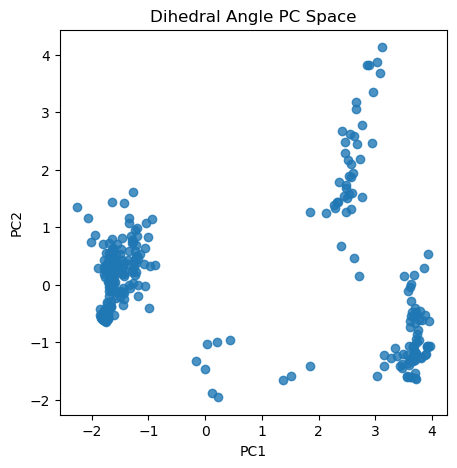

In [4]:
# plot the resulting PC space, with structures represted by markers
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(transform[:, 0], transform[:, 1], marker="o", alpha=0.8)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Dihedral Angle PC Space")

plt.show()

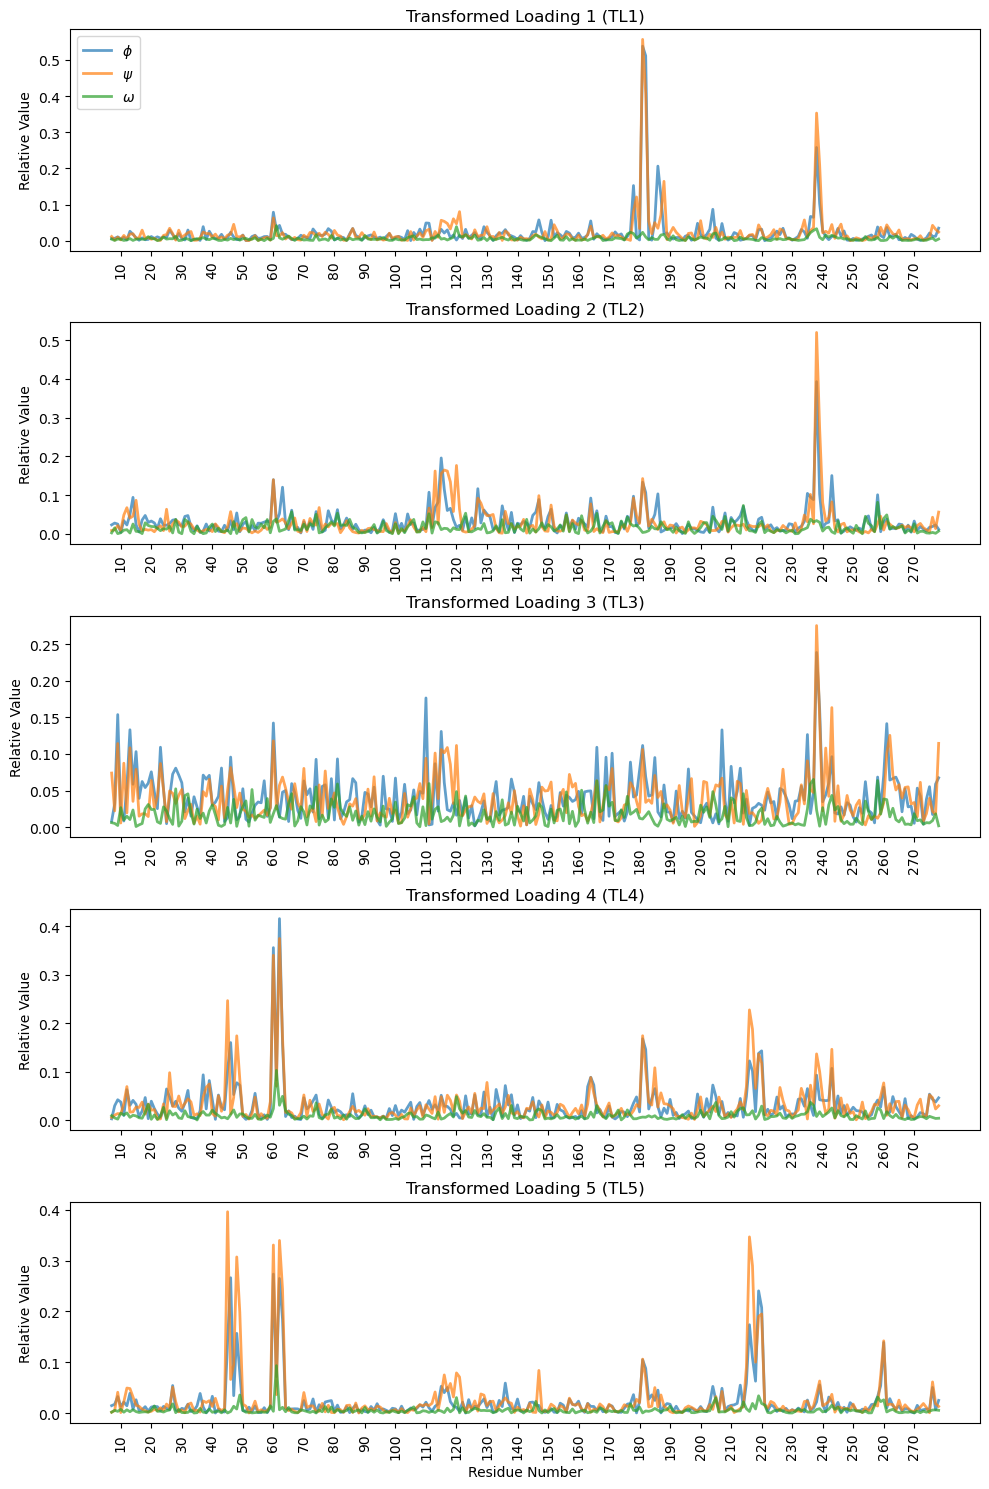

In [5]:
# plot the transformed loadings (accounting for sin and cos)
fig, ax = plt.subplots(5, 1, figsize=(10, 15))
ax = ax.flatten()
psi_idx = np.arange(0, dh_sin_cos_data_matrix.shape[1] // 2, 3)
omg_idx = np.arange(1, dh_sin_cos_data_matrix.shape[1] // 2, 3)
phi_idx = np.arange(2, dh_sin_cos_data_matrix.shape[1] // 2, 3)
dh_range = np.arange(resnum_bounds[0], resnum_bounds[1])

for i in np.arange(5):
    (phi_trace,) = ax[i].plot(
        dh_range,
        calculate_dh_tl(pca.components_[i])[phi_idx],
        "-",
        label=r"$\phi$",
        linewidth=2,
        alpha=0.7,
    )
    (psi_trace,) = ax[i].plot(
        dh_range,
        calculate_dh_tl(pca.components_[i])[psi_idx],
        "-",
        label=r"$\psi$",
        linewidth=2,
        alpha=0.7,
    )
    (omg_trace,) = ax[i].plot(
        dh_range,
        calculate_dh_tl(pca.components_[i])[omg_idx],
        "-",
        label=r"$\omega$",
        linewidth=2,
        alpha=0.7,
    )

    ax[i].set_title(f"Transformed Loading {i+1} (TL{i+1})")
    ax[i].set_xticks(
        [dh for dh in dh_range if dh % 10 == 0],
        labels=[dh for dh in dh_range if dh % 10 == 0],
        rotation="vertical",
    )

    if i == 0:
        ax[i].legend(
            [phi_trace, omg_trace, psi_trace],
            [r"$\phi$", r"$\omega$", r"$\psi$"],
            fontsize=10,
            loc="upper left",
        )
    ax[i].set_ylabel("Relative Value")
ax[0].legend(loc="upper left")
ax[-1].set_xlabel("Residue Number")
plt.tight_layout()
plt.show()